# Reading & Manipulating Tabular Data

- [Data](#Data)
- [Indices](#Indices)
- [Slicing & Dicing Data](#Slicing-and-Dicing-Data)
- [Editting Tables](#Editing-tables)
- [Writing Data](#Writing-Data)
- [Further Resources](#Further-Resources)

In [1]:
%matplotlib inline
from IPython.display import Image

import pandas
import numpy as np
from sqlalchemy import create_engine

To note:
- `matplotlib` magic
- Library import and alias

## Data

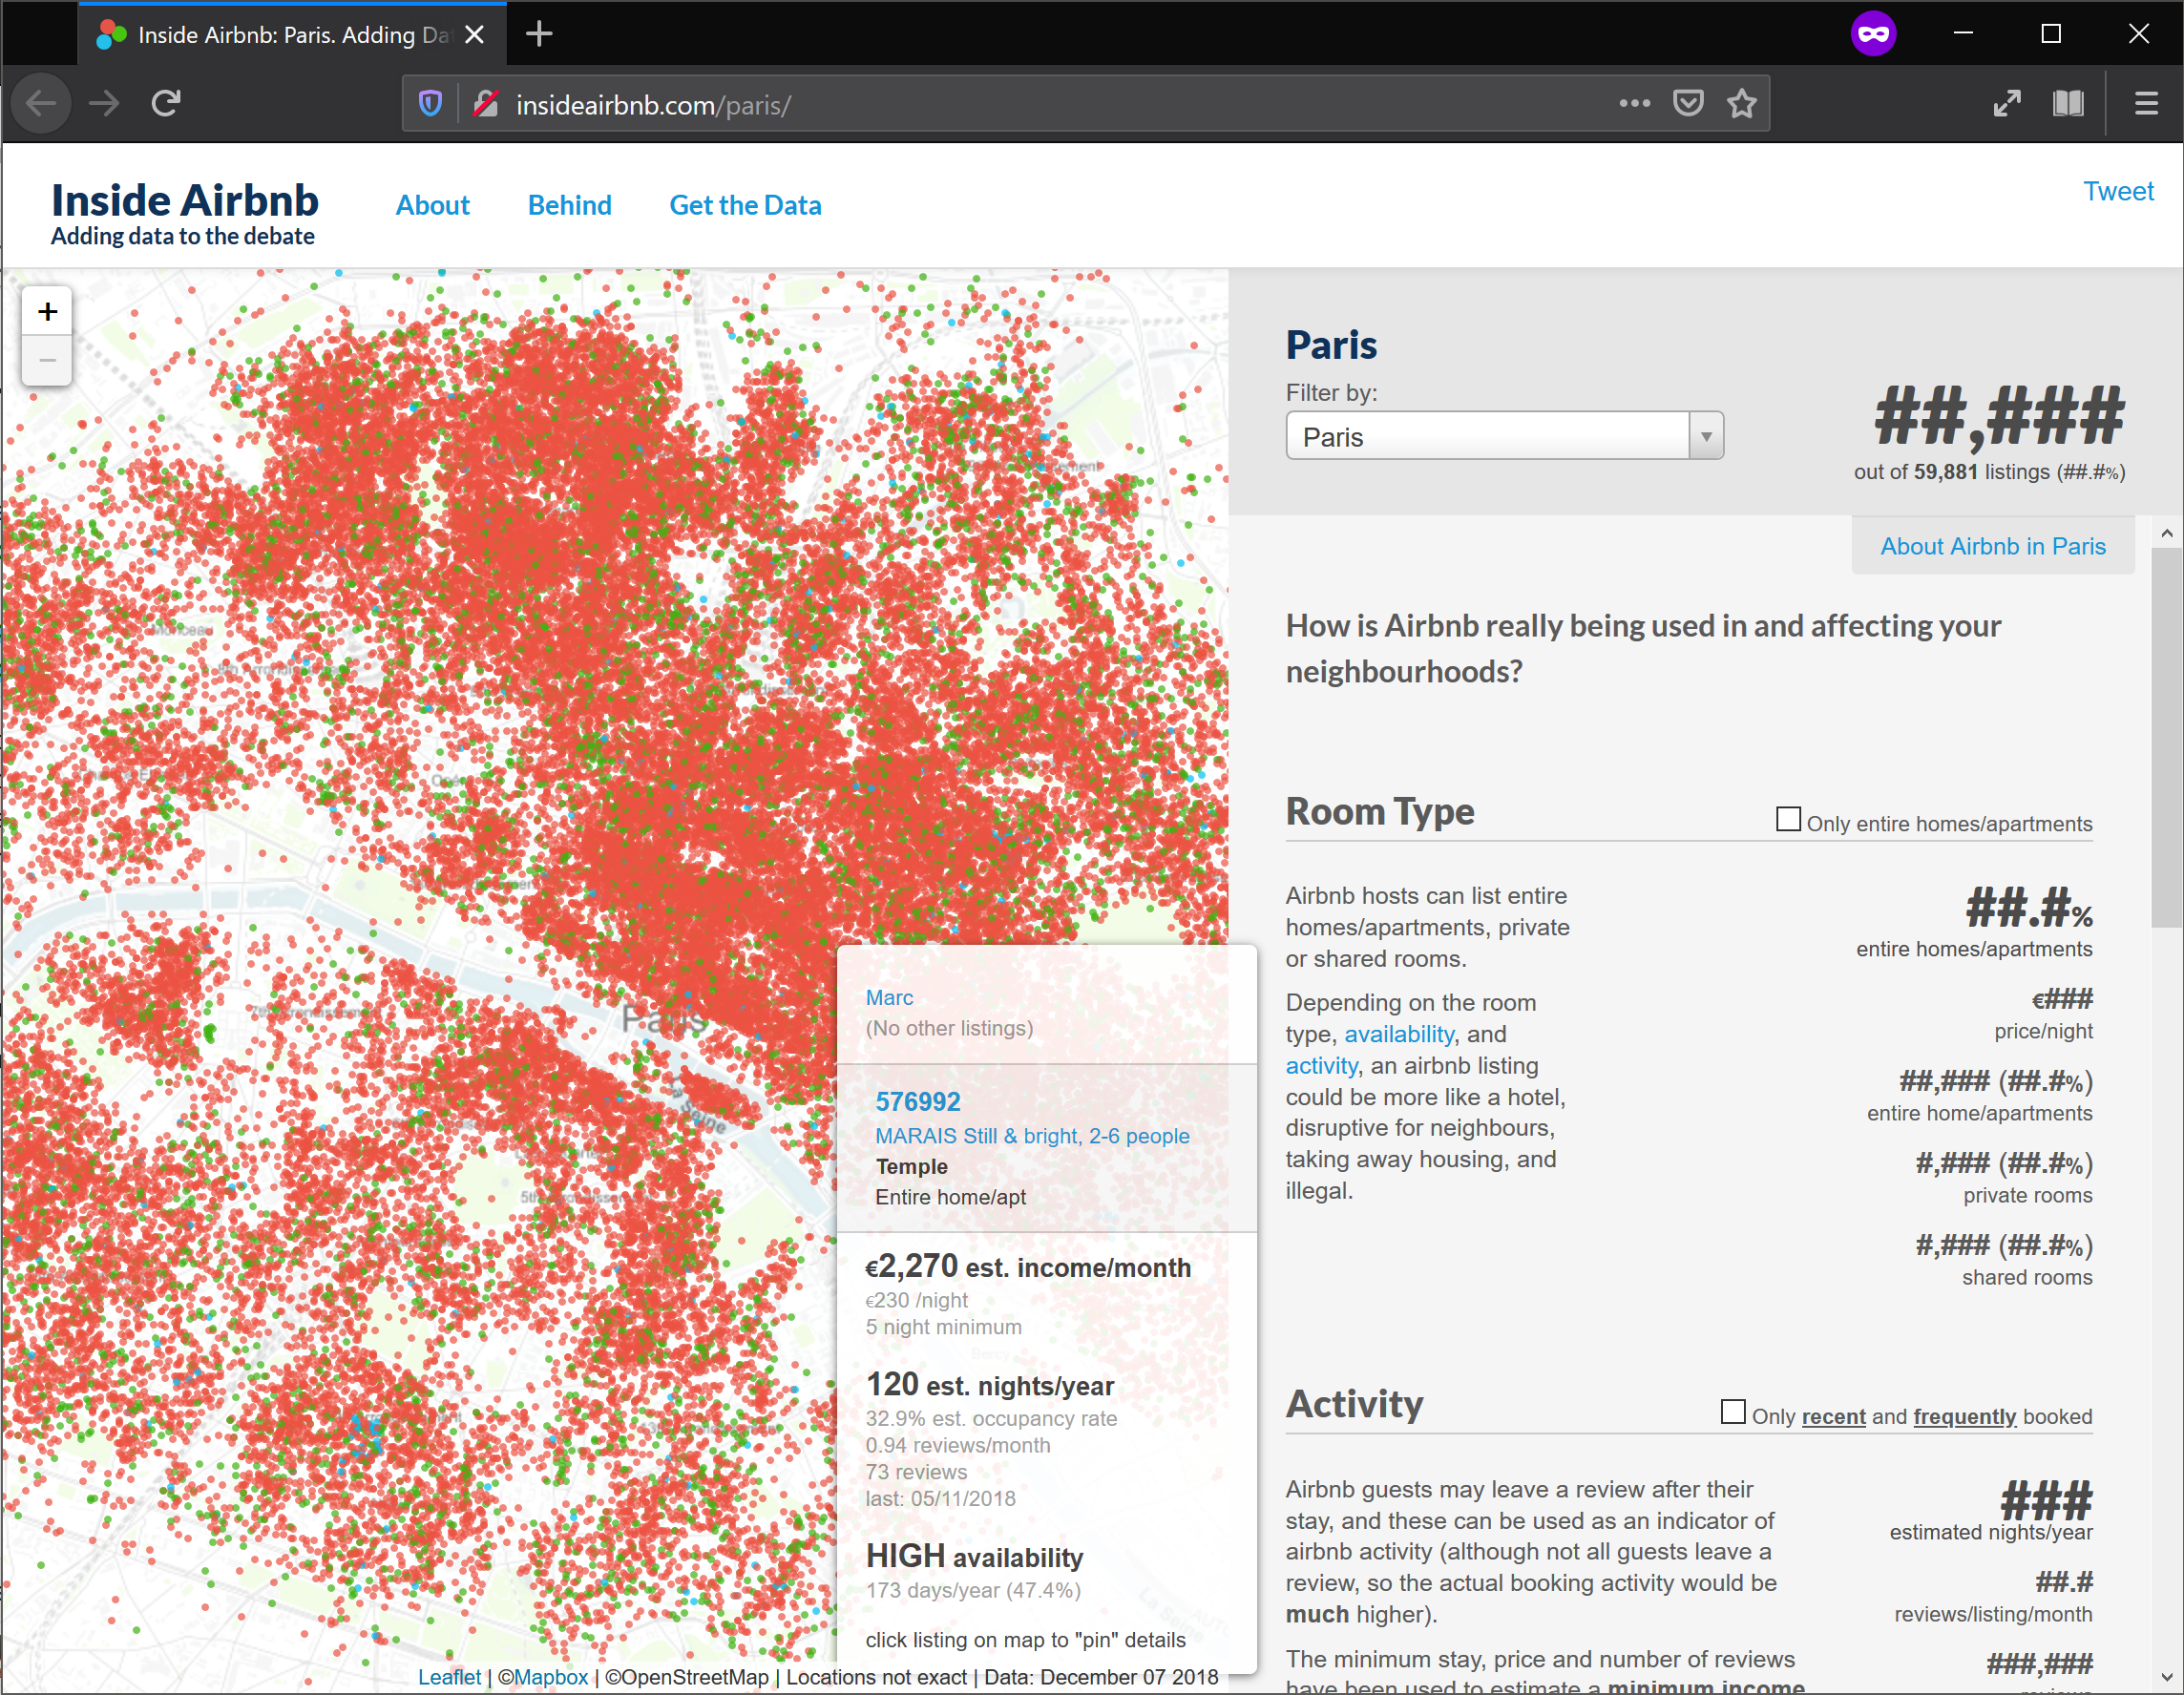

In [2]:
Image("../figs/paris_data.png")

* Read in `.csv`

In [3]:
db = pandas.read_csv("../data/paris_abb.csv.zip")

* Connect to `SQLite` and query

In [4]:
engine = create_engine("sqlite:///../data/paris_abb_mini.db")

In [5]:
qry = """
SELECT * 
FROM db 
LIMIT 5;
"""
dbs = pandas.read_sql(qry, engine)
dbs

id neighbourhood_cleansed property_type        room_type  accommodates  \
0  3109           Observatoire     Apartment  Entire home/apt             2   
1  5396         Hôtel-de-Ville     Apartment  Entire home/apt             2   
2  7397         Hôtel-de-Ville     Apartment  Entire home/apt             4   
3  7964                  Opéra     Apartment  Entire home/apt             2   
4  9952             Popincourt     Apartment  Entire home/apt             2   

   bathrooms  bedrooms  beds       bed_type  Price  
0        1.0       0.0   1.0       Real Bed   60.0  
1        1.0       0.0   1.0  Pull-out Sofa  115.0  
2        1.0       2.0   2.0       Real Bed  119.0  
3        1.0       1.0   1.0       Real Bed  130.0  
4        1.0       1.0   1.0       Real Bed   75.0

In [6]:
qry = """
SELECT id, Price 
FROM db 
WHERE neighbourhood_cleansed = 'Popincourt';
"""
dbs = pandas.read_sql(qry, engine)
dbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 2 columns):
id       5137 non-null int64
Price    5137 non-null float64
dtypes: float64(1), int64(1)
memory usage: 80.4 KB


* Explore

In [7]:
db.head()

id neighbourhood_cleansed property_type        room_type  accommodates  \
0  3109           Observatoire     Apartment  Entire home/apt             2   
1  5396         Hôtel-de-Ville     Apartment  Entire home/apt             2   
2  7397         Hôtel-de-Ville     Apartment  Entire home/apt             4   
3  7964                  Opéra     Apartment  Entire home/apt             2   
4  9952             Popincourt     Apartment  Entire home/apt             2   

   bathrooms  bedrooms  beds       bed_type  Price  
0        1.0       0.0   1.0       Real Bed   60.0  
1        1.0       0.0   1.0  Pull-out Sofa  115.0  
2        1.0       2.0   2.0       Real Bed  119.0  
3        1.0       1.0   1.0       Real Bed  130.0  
4        1.0       1.0   1.0       Real Bed   75.0

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50280 entries, 0 to 50279
Data columns (total 10 columns):
id                        50280 non-null int64
neighbourhood_cleansed    50280 non-null object
property_type             50280 non-null object
room_type                 50280 non-null object
accommodates              50280 non-null int64
bathrooms                 50280 non-null float64
bedrooms                  50280 non-null float64
beds                      50280 non-null float64
bed_type                  50280 non-null object
Price                     50280 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 3.8+ MB


In [9]:
db.describe()

id  accommodates     bathrooms      bedrooms          beds  \
count  5.028000e+04  50280.000000  50280.000000  50280.000000  50280.000000   
mean   1.968671e+07      3.063425      1.117045      1.077804      1.664698   
std    1.140675e+07      1.556731      0.687370      1.001000      1.164917   
min    3.109000e+03      1.000000      0.000000      0.000000      0.000000   
25%    9.340209e+06      2.000000      1.000000      1.000000      1.000000   
50%    1.999153e+07      2.000000      1.000000      1.000000      1.000000   
75%    2.987492e+07      4.000000      1.000000      1.000000      2.000000   
max    3.858893e+07     17.000000     50.000000     50.000000     50.000000   

              Price  
count  50280.000000  
mean     110.630549  
std      157.848189  
min        0.000000  
25%       60.000000  
50%       80.000000  
75%      120.000000  
max    10000.000000

`DataFrame` objects can hold different types of data

- "Whole" numbers (`int`)
- Decimals (`float`)
- Categorical (`pandas.Category`)
- Dates (`pandas.Timestamp`)
- Geo (`geopandas.GeoDataFrame`)
- ...

## Indices

In [10]:
db.head(2)

id neighbourhood_cleansed property_type        room_type  accommodates  \
0  3109           Observatoire     Apartment  Entire home/apt             2   
1  5396         Hôtel-de-Ville     Apartment  Entire home/apt             2   

   bathrooms  bedrooms  beds       bed_type  Price  
0        1.0       0.0   1.0       Real Bed   60.0  
1        1.0       0.0   1.0  Pull-out Sofa  115.0

In [11]:
db.set_index("id").head(2)

neighbourhood_cleansed property_type        room_type  accommodates  \
id                                                                         
3109           Observatoire     Apartment  Entire home/apt             2   
5396         Hôtel-de-Ville     Apartment  Entire home/apt             2   

      bathrooms  bedrooms  beds       bed_type  Price  
id                                                     
3109        1.0       0.0   1.0       Real Bed   60.0  
5396        1.0       0.0   1.0  Pull-out Sofa  115.0

In [12]:
dbi = db.set_index("id")

In [13]:
dbi.index

Int64Index([    3109,     5396,     7397,     7964,     9952,    10710,
               11170,    11213,    11265,    11798,
            ...
            38485563, 38489275, 38513797, 38516223, 38516341, 38517692,
            38520175, 38537044, 38546594, 38588929],
           dtype='int64', name='id', length=50280)

In [14]:
dbi.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'Price'],
      dtype='object')

## Slicing and Dicing Data

### Index-based queries

- Columns

In [15]:
db["Price"].head()

0     60.0
1    115.0
2    119.0
3    130.0
4     75.0
Name: Price, dtype: float64

- Generic point-querying

In [16]:
db.loc[0, "Price"]

60.0

- Full slice of one dimension

In [17]:
db.loc[0, :]

id                                   3109
neighbourhood_cleansed       Observatoire
property_type                   Apartment
room_type                 Entire home/apt
accommodates                            2
bathrooms                               1
bedrooms                                0
beds                                    1
bed_type                         Real Bed
Price                                  60
Name: 0, dtype: object

In [18]:
db.loc[:, "Price"]

0         60.0
1        115.0
2        119.0
3        130.0
4         75.0
         ...  
50275    250.0
50276     40.0
50277     60.0
50278     65.0
50279     69.0
Name: Price, Length: 50280, dtype: float64

- Range queries

In [19]:
db.loc[0:5, "neighbourhood_cleansed"]

0      Observatoire
1    Hôtel-de-Ville
2    Hôtel-de-Ville
3             Opéra
4        Popincourt
5            Élysée
Name: neighbourhood_cleansed, dtype: object

In [20]:
db.loc[5, "property_type":"bed_type"]

property_type          Apartment
room_type        Entire home/apt
accommodates                   4
bathrooms                      1
bedrooms                       1
beds                           2
bed_type                Real Bed
Name: 5, dtype: object

- List-based queries

In [21]:
db.loc[[0, 49, 19, 29, 39, 9], ["Price", "id"]]

Price     id
0    60.0   3109
49  128.0  32082
19   65.0  17919
29   80.0  21264
39   49.0  26567
9   120.0  11798

### Order-based queries

In [22]:
dbi.iloc[0:5, :]

neighbourhood_cleansed property_type        room_type  accommodates  \
id                                                                         
3109           Observatoire     Apartment  Entire home/apt             2   
5396         Hôtel-de-Ville     Apartment  Entire home/apt             2   
7397         Hôtel-de-Ville     Apartment  Entire home/apt             4   
7964                  Opéra     Apartment  Entire home/apt             2   
9952             Popincourt     Apartment  Entire home/apt             2   

      bathrooms  bedrooms  beds       bed_type  Price  
id                                                     
3109        1.0       0.0   1.0       Real Bed   60.0  
5396        1.0       0.0   1.0  Pull-out Sofa  115.0  
7397        1.0       2.0   2.0       Real Bed  119.0  
7964        1.0       1.0   1.0       Real Bed  130.0  
9952        1.0       1.0   1.0       Real Bed   75.0

---

**EXERCISE**: 

- Slice the dataset to keep only properties with the following IDs, in that order: `38520175`,  `619716`, and `37847454`
- Extract the section of the dataset that includes the 50th to the 100th rows, and the `room_type` and `bedrooms` columns

---

### Conditional queries

- Using `loc`

In [23]:
db.loc[db["neighbourhood_cleansed"] == "Observatoire", 
       ["neighbourhood_cleansed", "Price"]]\
  .head()

neighbourhood_cleansed  Price
0             Observatoire   60.0
47            Observatoire   90.0
52            Observatoire  150.0
104           Observatoire   84.0
144           Observatoire  140.0

In [24]:
db.loc[db["Price"] < 100, ["id", "neighbourhood_cleansed"]].head()

id neighbourhood_cleansed
0    3109           Observatoire
4    9952             Popincourt
5   10710                 Élysée
6   11170               Panthéon
10  11848             Popincourt

In [25]:
db.loc[(db["Price"] < 100) & \
       (db["bathrooms"] >= 8),
       :]

id neighbourhood_cleansed   property_type     room_type  \
12066   8876983             Luxembourg  Boutique hotel  Private room   
22964  18766792             Luxembourg  Boutique hotel  Private room   
24788  19819352             Luxembourg  Boutique hotel  Private room   
25798  20433587             Luxembourg  Boutique hotel  Private room   
26048  20691340             Luxembourg  Boutique hotel  Private room   
26108  20747725             Luxembourg  Boutique hotel  Private room   
26121  20768013             Luxembourg  Boutique hotel  Private room   

       accommodates  bathrooms  bedrooms  beds  bed_type  Price  
12066            16       50.0      50.0  16.0  Real Bed   85.0  
22964            16       50.0      50.0  17.0  Real Bed   85.0  
24788            16       50.0      50.0  20.0  Real Bed   85.0  
25798            16       50.0      50.0  50.0  Real Bed   85.0  
26048            16       50.0      50.0  50.0  Real Bed   85.0  
26108            16       50.0      50.0  50.0  Real Bed   85.0  
26121            16       50.0      50.0  50.0  Real Bed   85.0

- Conditional filters

In [26]:
fltr = db["bathrooms"] > 8
fltr.head()

0    False
1    False
2    False
3    False
4    False
Name: bathrooms, dtype: bool

In [27]:
db[fltr]

id neighbourhood_cleansed   property_type     room_type  \
12066   8876983             Luxembourg  Boutique hotel  Private room   
22964  18766792             Luxembourg  Boutique hotel  Private room   
24788  19819352             Luxembourg  Boutique hotel  Private room   
25798  20433587             Luxembourg  Boutique hotel  Private room   
26048  20691340             Luxembourg  Boutique hotel  Private room   
26108  20747725             Luxembourg  Boutique hotel  Private room   
26121  20768013             Luxembourg  Boutique hotel  Private room   

       accommodates  bathrooms  bedrooms  beds  bed_type  Price  
12066            16       50.0      50.0  16.0  Real Bed   85.0  
22964            16       50.0      50.0  17.0  Real Bed   85.0  
24788            16       50.0      50.0  20.0  Real Bed   85.0  
25798            16       50.0      50.0  50.0  Real Bed   85.0  
26048            16       50.0      50.0  50.0  Real Bed   85.0  
26108            16       50.0      50.0  50.0  Real Bed   85.0  
26121            16       50.0      50.0  50.0  Real Bed   85.0

* Concatenated queries

In [28]:
db.loc[(db["Price"] < 100) & \
       (db["bathrooms"] >= 8),
       :]

id neighbourhood_cleansed   property_type     room_type  \
12066   8876983             Luxembourg  Boutique hotel  Private room   
22964  18766792             Luxembourg  Boutique hotel  Private room   
24788  19819352             Luxembourg  Boutique hotel  Private room   
25798  20433587             Luxembourg  Boutique hotel  Private room   
26048  20691340             Luxembourg  Boutique hotel  Private room   
26108  20747725             Luxembourg  Boutique hotel  Private room   
26121  20768013             Luxembourg  Boutique hotel  Private room   

       accommodates  bathrooms  bedrooms  beds  bed_type  Price  
12066            16       50.0      50.0  16.0  Real Bed   85.0  
22964            16       50.0      50.0  17.0  Real Bed   85.0  
24788            16       50.0      50.0  20.0  Real Bed   85.0  
25798            16       50.0      50.0  50.0  Real Bed   85.0  
26048            16       50.0      50.0  50.0  Real Bed   85.0  
26108            16       50.0      50.0  50.0  Real Bed   85.0  
26121            16       50.0      50.0  50.0  Real Bed   85.0

In [29]:
db.loc[(db["Price"] < 5) | \
       (db["Price"] > 5000),
       :]

id neighbourhood_cleansed       property_type        room_type  \
8149    6088687                 Temple           Apartment  Entire home/apt   
10113   7225849      Buttes-Montmartre           Apartment  Entire home/apt   
11286   8093890                  Passy           Apartment  Entire home/apt   
25106  19974916      Buttes-Montmartre         Condominium  Entire home/apt   
25558  20219162        Buttes-Chaumont           Apartment  Entire home/apt   
25676  20291987                  Passy           Apartment  Entire home/apt   
25697  20313940                 Temple           Apartment  Entire home/apt   
26899  21422028             Popincourt           Apartment  Entire home/apt   
32190  25448670              Vaugirard           Apartment  Entire home/apt   
35291  27608896           Observatoire           Apartment     Private room   
43961  34380017                 Bourse  Serviced apartment       Hotel room   
46767  36019554                 Louvre  Serviced apartment       Hotel room   
47574  36402651    Batignolles-Monceau               House  Entire home/apt   

       accommodates  bathrooms  bedrooms  beds  bed_type    Price  
8149              2        1.0       1.0   1.0  Real Bed   8500.0  
10113             8        2.0       2.0   5.0  Real Bed   9379.0  
11286             3        1.0       2.0   2.0  Real Bed   8721.0  
25106             4        1.0       1.0   2.0  Real Bed      0.0  
25558             1        1.0       0.0   1.0  Real Bed      0.0  
25676             3        1.0       0.0   2.0  Real Bed      0.0  
25697             2        1.0       0.0   1.0  Real Bed      0.0  
26899             3        2.0       2.0   3.0  Real Bed      0.0  
32190             1        1.0       0.0   1.0  Real Bed   8576.0  
35291             1        1.0       0.0   1.0  Real Bed   9059.0  
43961             8        2.5       3.0   4.0  Real Bed   5150.0  
46767             8        2.5       2.0   4.0  Real Bed   8000.0  
47574            12        3.0       4.0   5.0  Real Bed  10000.0

- Using `query`

In [30]:
db.query("neighbourhood_cleansed == 'Observatoire'")\
  [["neighbourhood_cleansed", "Price"]]\
  .head()

neighbourhood_cleansed  Price
0             Observatoire   60.0
47            Observatoire   90.0
52            Observatoire  150.0
104           Observatoire   84.0
144           Observatoire  140.0

In [31]:
db.query("Price < 100")\
  [["id", "neighbourhood_cleansed"]]\
  .head()

id neighbourhood_cleansed
0    3109           Observatoire
4    9952             Popincourt
5   10710                 Élysée
6   11170               Panthéon
10  11848             Popincourt

In [32]:
db.query("(Price < 100) & (bathrooms >= 8)")

id neighbourhood_cleansed   property_type     room_type  \
12066   8876983             Luxembourg  Boutique hotel  Private room   
22964  18766792             Luxembourg  Boutique hotel  Private room   
24788  19819352             Luxembourg  Boutique hotel  Private room   
25798  20433587             Luxembourg  Boutique hotel  Private room   
26048  20691340             Luxembourg  Boutique hotel  Private room   
26108  20747725             Luxembourg  Boutique hotel  Private room   
26121  20768013             Luxembourg  Boutique hotel  Private room   

       accommodates  bathrooms  bedrooms  beds  bed_type  Price  
12066            16       50.0      50.0  16.0  Real Bed   85.0  
22964            16       50.0      50.0  17.0  Real Bed   85.0  
24788            16       50.0      50.0  20.0  Real Bed   85.0  
25798            16       50.0      50.0  50.0  Real Bed   85.0  
26048            16       50.0      50.0  50.0  Real Bed   85.0  
26108            16       50.0      50.0  50.0  Real Bed   85.0  
26121            16       50.0      50.0  50.0  Real Bed   85.0

## Editing tables

- Modifying single values

In [33]:
db.loc[1, "bed_type"]

'Pull-out Sofa'

In [34]:
db.loc[1, "bed_type"] = "Pullout Sofa"

In [35]:
db.loc[1, "bed_type"]

'Pullout Sofa'

- Modifying blocks of values

In [36]:
db.neighbourhood_cleansed.unique()

array(['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Popincourt', 'Élysée',
       'Panthéon', 'Entrepôt', 'Buttes-Montmartre', 'Gobelins',
       'Buttes-Chaumont', 'Luxembourg', 'Louvre', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Temple', 'Passy'], dtype=object)

In [37]:
db.loc[db["neighbourhood_cleansed"] == "Hôtel-de-Ville",
       "neighbourhood_cleansed"] = "City Council"

In [38]:
db.neighbourhood_cleansed.unique()

array(['Observatoire', 'City Council', 'Opéra', 'Popincourt', 'Élysée',
       'Panthéon', 'Entrepôt', 'Buttes-Montmartre', 'Gobelins',
       'Buttes-Chaumont', 'Luxembourg', 'Louvre', 'Palais-Bourbon',
       'Reuilly', 'Bourse', 'Ménilmontant', 'Vaugirard',
       'Batignolles-Monceau', 'Temple', 'Passy'], dtype=object)

- Creating new columns and rows

In [39]:
db["more_beds_than_accomodates"] = db["beds"] > db["accommodates"]

---

**EXERCISE**

- Find how many properties have more than ten bathrooms
- Can you rent an AirBnb in Paris with only one bed but three bedrooms?
- In which neighbourhoods can you rent an "Airbed"?

---

## Writing Data

In [40]:
[i for i in dir(db) if i[:3]=="to_"]

['to_clipboard',
 'to_csv',
 'to_dense',
 'to_dict',
 'to_excel',
 'to_feather',
 'to_gbq',
 'to_hdf',
 'to_html',
 'to_json',
 'to_latex',
 'to_msgpack',
 'to_numpy',
 'to_parquet',
 'to_period',
 'to_pickle',
 'to_records',
 'to_sparse',
 'to_sql',
 'to_stata',
 'to_string',
 'to_timestamp',
 'to_xarray']

## Further Resources

Similar introduction:

> [http://darribas.org/gds19/content/labs/lab_01.html](http://darribas.org/gds17/content/labs/lab_01.html)

More stuff on indices:

> [http://pandas.pydata.org/pandas-docs/stable/indexing.html](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

And for the pros:

> [http://pandas.pydata.org/pandas-docs/stable/advanced.html](http://pandas.pydata.org/pandas-docs/stable/advanced.html)